## Environment Setup

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.insert (0, './_functions_/')
from functions_electric_cars import *

## Datasets

In [2]:
population = pd.read_csv('./raw_data/population_states.csv')
stations_state = pd.read_csv('./clean_data/stations_per_state.csv')
population.head()

,Land,Total,Area,Density
0,Baden-Württemberg,11280 257,"35747,85",316
1,Bayern,13369 393,"70541,58",190
2,Berlin,3755 251,"891,12",4214
3,Brandenburg,2573 135,"29654,38",87
4,Bremen,684864,"419,61",1632


In [3]:
stations_state.head()

,state,number_of_charging_points,number_fast_charging_stations,number_regular_charging_stations
0,Baden-Württemberg,93695,14271,79424
1,Bayern,111983,19649,92334
2,Berlin,18854,2325,16529
3,Brandenburg,12340,2897,9443
4,Bremen,3969,537,3432


In [4]:
population.rename(columns = {"Land":"state", "Total":"inhabitants", "Area":"area", "Density":"population_density"}, inplace=True)

population = population.merge(stations_state, on = "state", how="left")

population.head(5)



,state,inhabitants,area,population_density,number_of_charging_points,number_fast_charging_stations,number_regular_charging_stations
0,Baden-Württemberg,11280 257,"35747,85",316,93695,14271,79424
1,Bayern,13369 393,"70541,58",190,111983,19649,92334
2,Berlin,3755 251,"891,12",4214,18854,2325,16529
3,Brandenburg,2573 135,"29654,38",87,12340,2897,9443
4,Bremen,684864,"419,61",1632,3969,537,3432


In [5]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   state                             16 non-null     object
 1   inhabitants                       16 non-null     object
 2   area                              16 non-null     object
 3   population_density                16 non-null     int64 
 4   number_of_charging_points         16 non-null     int64 
 5   number_fast_charging_stations     16 non-null     int64 
 6   number_regular_charging_stations  16 non-null     int64 
dtypes: int64(4), object(3)
memory usage: 1.0+ KB


In [6]:
# Convert types of "Area" and "Total" to int
population["area"] = population["area"].str.replace(",", "").astype(int)
population["inhabitants"] = population ["inhabitants"].str.replace(" ", "").astype(int)

population.head(16)

,state,inhabitants,area,population_density,number_of_charging_points,number_fast_charging_stations,number_regular_charging_stations
0,Baden-Württemberg,11280257,3574785,316,93695,14271,79424
1,Bayern,13369393,7054158,190,111983,19649,92334
2,Berlin,3755251,89112,4214,18854,2325,16529
3,Brandenburg,2573135,2965438,87,12340,2897,9443
4,Bremen,684864,41961,1632,3969,537,3432
5,Hamburg,1892122,75509,2506,14077,2157,11920
6,Hessen,6391360,2111562,303,41655,7504,34151
7,Mecklenburg-Vorpommern,1628378,2329490,70,6887,1677,5210
8,Niedersachsen,8140242,4770990,171,54124,11727,42397
9,Nordrhein-Westfalen,18139116,3411272,532,101969,17163,84806


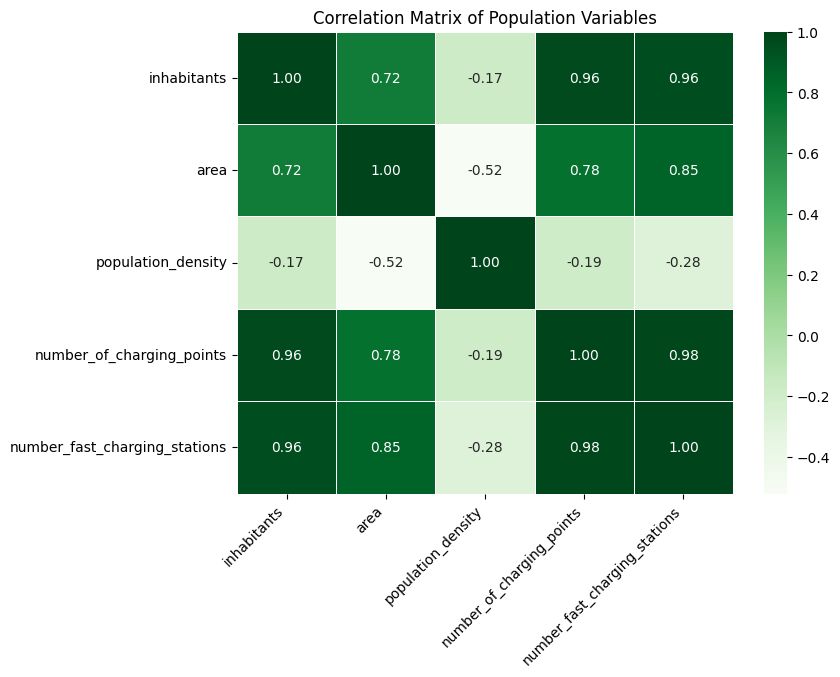

In [7]:
numbers = ['inhabitants', 'area', 'population_density', 'number_of_charging_points', 'number_fast_charging_stations']
correlation_matrix = population[numbers].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f", linewidths=0.5)

# Add a title
plt.title("Correlation Matrix of Population Variables")
plt.xticks(rotation=45, ha="right")
# Show the plot
plt.show()

## Create a new dataset

Save the new dataframe

In [9]:
population.to_csv('./clean_data/population_states_stations.csv', index = False)